In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [ ]:
v = TfidfVectorizer()
transform_output = v.fit_transform(corpus)

In [ ]:
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [ ]:
v.get_feature_names_out()

array(['already', 'am', 'amazon', 'and', 'announcing', 'apple', 'are',
       'ate', 'biryani', 'dot', 'eating', 'eco', 'google', 'grapes',
       'iphone', 'ironman', 'is', 'loki', 'microsoft', 'model', 'new',
       'pixel', 'pizza', 'surface', 'tesla', 'thor', 'tomorrow', 'you'],
      dtype=object)

In [ ]:
all_feature = v.get_feature_names_out()

for word in all_feature:
  index  = v.vocabulary_.get(word)
  idf_score = v.idf_[index]
  print(f'{word}:{idf_score}')

already:2.386294361119891
am:2.386294361119891
amazon:2.386294361119891
and:2.386294361119891
announcing:1.2876820724517808
apple:2.386294361119891
are:2.386294361119891
ate:2.386294361119891
biryani:2.386294361119891
dot:2.386294361119891
eating:1.9808292530117262
eco:2.386294361119891
google:2.386294361119891
grapes:2.386294361119891
iphone:2.386294361119891
ironman:2.386294361119891
is:1.1335313926245225
loki:2.386294361119891
microsoft:2.386294361119891
model:2.386294361119891
new:1.2876820724517808
pixel:2.386294361119891
pizza:2.386294361119891
surface:2.386294361119891
tesla:2.386294361119891
thor:2.386294361119891
tomorrow:1.2876820724517808
you:2.386294361119891


In [ ]:
for word in all_feature:
  index  = v.vocabulary_.get(word)
  print(f'{word},{index}')

already,0
am,1
amazon,2
and,3
announcing,4
apple,5
are,6
ate,7
biryani,8
dot,9
eating,10
eco,11
google,12
grapes,13
iphone,14
ironman,15
is,16
loki,17
microsoft,18
model,19
new,20
pixel,21
pizza,22
surface,23
tesla,24
thor,25
tomorrow,26
you,27


In [ ]:
transform_output.toarray()

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2698

***product sold on e-commerce website, classify it in one of the 4 categories***

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/nlp files/Ecommerce_data.csv')
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [ ]:
df['label'].value_counts()

,count
label,
Household,6000
Electronics,6000
Clothing & Accessories,6000
Books,6000


In [ ]:
target = {'Household':0, 'Electronics':1, 'Clothing & Accessories':2, 'Books':3}
df['target'] = df['label'].map(target)
df.head()

,Text,label,target
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.target,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.target
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19200,), (4800,), (19200,), (4800,))

***Attempt 1 :***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.96      0.97      0.97      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.95      0.96      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



***Attempt 2 :***

In [ ]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1200
           1       0.96      0.96      0.96      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.93      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



***Attempt 3 :***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.97      0.97      0.97      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.97      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800




***Use text pre-processing to remove stop words, punctuations and apply lemmatization***

In [ ]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [ ]:
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [ ]:
df.head()

,Text,label,target,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2,Indira Designer Women Art Mysore Silk Saree Bl...


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.target,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.target
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19200,), (4800,), (19200,), (4800,))

In [ ]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.96      0.97      0.97      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.95      0.96      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [ ]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1200
           1       0.96      0.96      0.96      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.93      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [ ]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.97      0.97      0.97      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.97      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1148,   21,   19,   12],
       [  18, 1168,    7,    7],
       [   8,    1, 1181,   10],
       [  17,   13,    3, 1167]])

Text(95.72222222222221, 0.5, 'Truth')

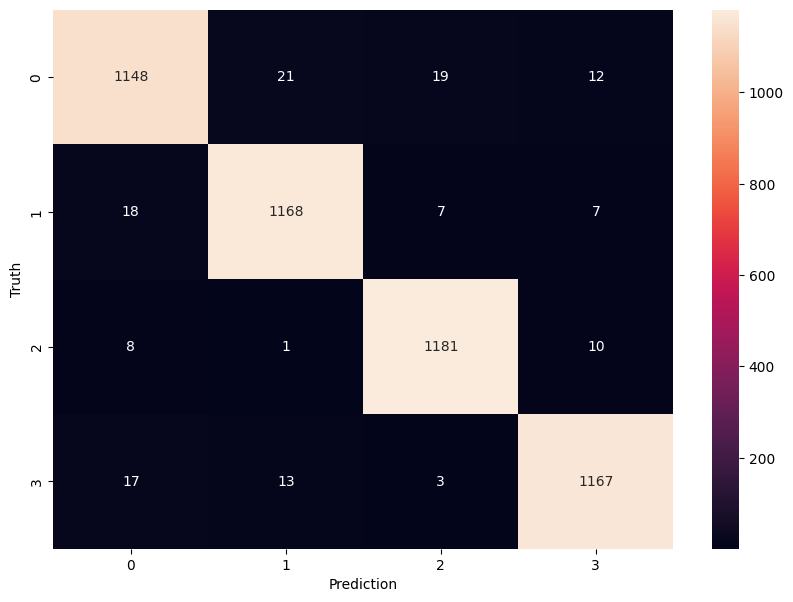

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

***Exercise***

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/nlp files/Emotion_classify_Data.csv')
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [ ]:
df['Emotion'].value_counts()

,count
Emotion,
anger,2000
joy,2000
fear,1937


In [ ]:
target = {'anger':0,'joy':1,'fear':2}
df['target'] = df['Emotion'].map(target)
df.head()

,Comment,Emotion,target
0,i seriously hate one subject to death but now ...,fear,2
1,im so full of life i feel appalled,anger,0
2,i sit here to write i start to dig out my feel...,fear,2
3,ive been really angry with r and i feel like a...,joy,1
4,i feel suspicious if there is no one outside l...,fear,2


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['Comment'],df['target'],test_size = 0.2)
x_train.shape,x_test.shape

((4749,), (1188,))

In [ ]:
x_train[:5]

,Comment
4621,i feel rushed i make poor food choices and sta...
4720,i cant hide my feeling when i feel so glad
2026,waiting for my girlfriend to come from her apt...
2076,i tend not to want to cook if i feel grumpy or...
4487,i should go to sleep but i m feeling reluctant...


In [ ]:
# import CountVectorizer, RandomForest, pipeline, classification_report from sklearn
from sklearn import pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
# using CountVectorizer with only trigrams.

model = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('random_forest',RandomForestClassifier())
])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.34      0.41       395
           1       0.59      0.28      0.38       402
           2       0.41      0.77      0.53       391

    accuracy                           0.46      1188
   macro avg       0.51      0.46      0.44      1188
weighted avg       0.51      0.46      0.44      1188



In [ ]:
# using CountVectorizer with both unigram and bigrams and use Multinomial Naive Bayes as the classifier.

model = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('random_forest',MultinomialNB())
])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       395
           1       0.88      0.82      0.85       402
           2       0.83      0.88      0.85       391

    accuracy                           0.85      1188
   macro avg       0.86      0.85      0.85      1188
weighted avg       0.86      0.85      0.85      1188



In [ ]:
# using CountVectorizer with both unigram and Bigrams and use RandomForest as the classifier.
model = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('random_forest',RandomForestClassifier())
])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       395
           1       0.86      0.96      0.91       402
           2       0.95      0.90      0.92       391

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



In [ ]:
# using TF-IDF vectorizer for Pre-processing the text and use RandomForest as the classifier.

model = Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('random_forest',RandomForestClassifier())
])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       395
           1       0.87      0.91      0.89       402
           2       0.92      0.90      0.91       391

    accuracy                           0.90      1188
   macro avg       0.91      0.90      0.90      1188
weighted avg       0.91      0.90      0.90      1188



***Use text pre-processing to remove stop words, punctuations and apply lemmatization***

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
  doc = nlp(text)
  filter_token = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filter_token.append(token.lemma_)
  return " ".join(filter_token)

In [ ]:
text = 'I am eating birani and samosa lalalala.'
preprocess(text)

'eat birani samosa lalalala'

In [ ]:
df['preprocess_comm'] = df['Comment'].apply(preprocess)
df.head()

,Comment,Emotion,target,preprocess_comm
0,i seriously hate one subject to death but now ...,fear,2,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,anger,0,m life feel appalled
2,i sit here to write i start to dig out my feel...,fear,2,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,1,ve angry r feel like idiot trust place
4,i feel suspicious if there is no one outside l...,fear,2,feel suspicious outside like rapture happen


In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(df['preprocess_comm'],df['target'],test_size=0.2)
x_train.shape,x_test.shape

((4749,), (1188,))

In [ ]:
# using CountVectorizer with both unigrams and bigrams and use RandomForest as the classifier.

model = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('random_forest',RandomForestClassifier())
])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       398
           1       0.94      0.96      0.95       391
           2       0.97      0.89      0.93       399

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



In [ ]:
# using TF-IDF vectorizer for pre-processing the text and use RandomForest as the classifier.

model = Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('random_forest',RandomForestClassifier())
])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       398
           1       0.93      0.95      0.94       391
           2       0.95      0.90      0.93       399

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188

